In [1]:
from src.data import read_data,prepare_data
from src.models import train_model,predict_model
import pandas as pd
from pandas.plotting import lag_plot
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.mode.chained_assignment = None
%matplotlib inline

In [2]:
# Reading the data
PATH_TO_TRAIN = '../data/raw/train15.csv'
PATH_TO_PREDICTORS = '../data/raw/predictors15.csv'
df_original = read_data.read_data(PATH_TO_TRAIN,PATH_TO_PREDICTORS)

In [3]:
df_original.describe()

,ZONEID,POWER,VAR78,VAR79,VAR134,VAR157,VAR164,VAR165,VAR166,VAR167,VAR169,VAR175,VAR178,VAR228
count,56952.000000,56952.000000,56952.000000,56952.000000,56952.000000,56952.000000,56952.000000,56952.000000,56952.000000,56952.000000,5.695200e+04,5.695200e+04,5.695200e+04,56952.000000
mean,2.000000,0.186872,0.041470,0.016408,93807.236996,67.610793,0.436522,0.738276,-0.257701,285.435328,1.250545e+07,1.382187e+07,1.462089e+07,0.000997
std,0.816504,0.274926,0.122040,0.050371,1106.902058,20.336232,0.400015,2.452712,1.983266,7.051843,6.593117e+06,7.755640e+06,7.049271e+06,0.003445
min,1.000000,0.000000,0.000000,0.000000,90345.875000,6.348233,0.000000,-8.908603,-8.404230,269.436279,1.147127e+05,8.216176e+05,6.465230e+05,0.000000
25%,1.000000,0.000000,0.000000,0.000000,92903.000000,52.359467,0.012650,-0.775085,-1.594760,280.142761,7.616334e+06,7.271122e+06,9.568199e+06,0.000000
50%,2.000000,0.003117,0.002919,0.000117,94008.093750,70.545609,0.353457,0.368076,-0.411445,284.784790,1.141026e+07,1.368581e+07,1.342308e+07,0.000000
75%,3.000000,0.333608,0.033479,0.007191,94668.203125,84.952175,0.884594,2.143609,0.944802,290.000977,1.742018e+07,2.002196e+07,2.002346e+07,0.000257
max,3.000000,1.003550,4.103422,0.820470,96317.125000,102.838364,1.000008,13.056718,10.710998,310.458496,3.462558e+07,3.467366e+07,3.772200e+07,0.055961


In [4]:
df = df_original.rename(index=str, columns={"VAR78":"LIQUID_WATER", "VAR79": "ICE_WATER",  "VAR134":"SURFACE_PRESSURE","VAR157":"RELATIVE_HUMIDITY","VAR164":"TOTAL_CLOUD_COVER","VAR165":"WIND_U","VAR166":"WIND_V","VAR167":"TEMPERATURE","VAR169":"SOLAR_RAD","VAR175":"TERMAL_RAD","VAR178":"TOP_NET_SOLAR_RAD","VAR228":"TOTAL_PRECIPATION"})
print(df.columns)

Index(['ZONEID', 'TIMESTAMP', 'POWER', 'LIQUID_WATER', 'ICE_WATER',
       'SURFACE_PRESSURE', 'RELATIVE_HUMIDITY', 'TOTAL_CLOUD_COVER', 'WIND_U',
       'WIND_V', 'TEMPERATURE', 'SOLAR_RAD', 'TERMAL_RAD', 'TOP_NET_SOLAR_RAD',
       'TOTAL_PRECIPATION'],
      dtype='object')


In [5]:
df = df.set_index("TIMESTAMP")

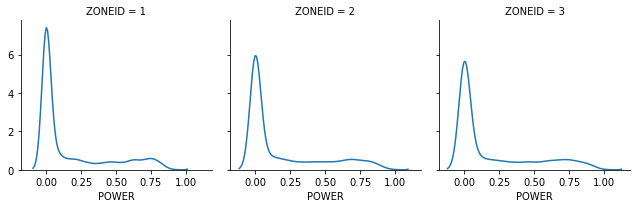

In [6]:
g = sns.FacetGrid(df, col="ZONEID")
g.map(sns.kdeplot, "POWER")

In [7]:
df = df[df.ZONEID == 1].drop('ZONEID',axis=1)

In [8]:
ONE_DAY = 24
ONE_WEEK = 7 * ONE_DAY
ONE_MONTH = 30 * ONE_DAY
ONE_YEAR = 365 * ONE_DAY

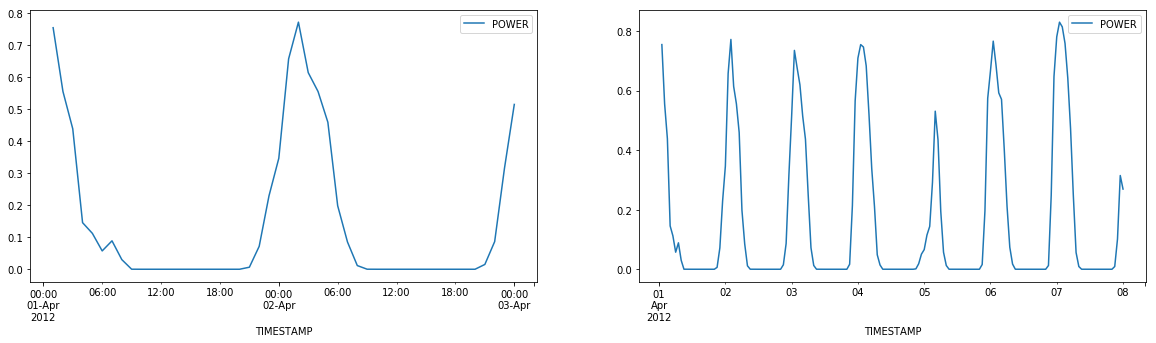

In [9]:
fig, ax = plt.subplots(1,2,figsize=(20,10))
df[:2*ONE_DAY].plot(y='POWER',ax=ax[0])
df[:ONE_WEEK].plot(y='POWER',figsize=(20,5),ax=ax[1])

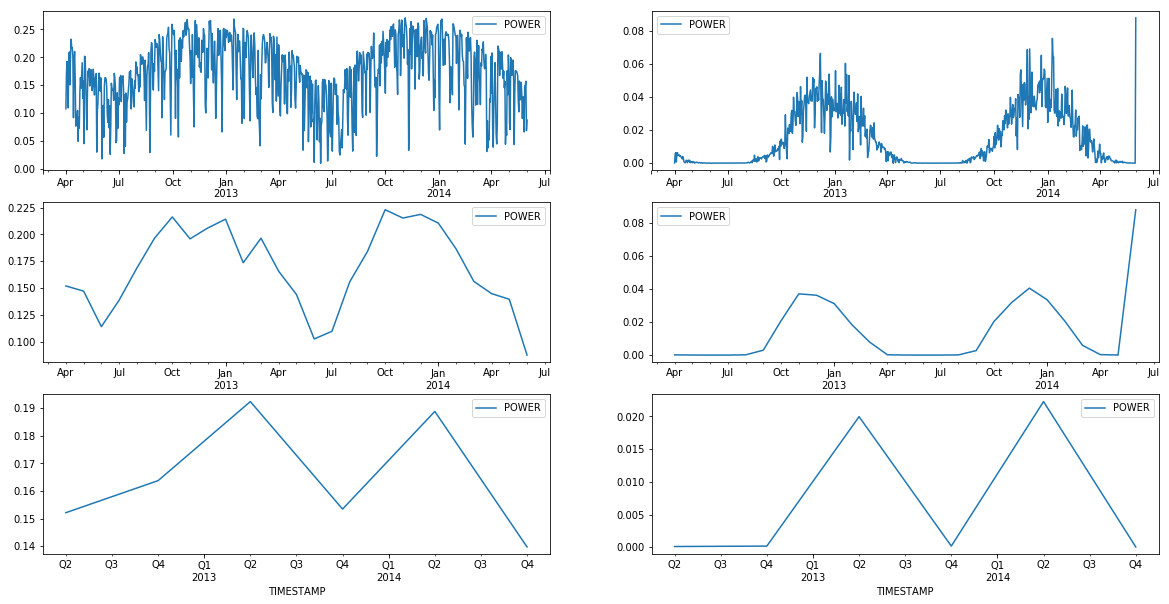

In [10]:
power_by_day = df.resample('D')
power_by_month = df.resample('M')
power_by_semester = df.resample('6M')

fig, ax = plt.subplots(3,2,figsize=(20,10))

power_by_day.mean().plot(y='POWER',ax = ax[0][0])
power_by_day.median().plot(y='POWER', ax =ax[0][1])
power_by_month.mean().plot(y='POWER', ax =ax[1][0])
power_by_month.median().plot(y='POWER', ax =ax[1][1])
power_by_semester.mean().plot(y='POWER', ax =ax[2][0])
power_by_semester.median().plot(y='POWER', ax =ax[2][1])

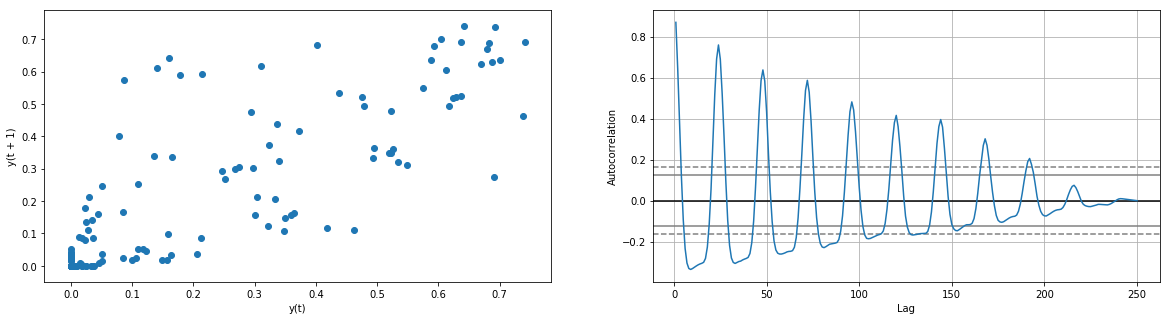

In [13]:
fig, ax = plt.subplots(1,2 ,figsize=(20,5))
lag_plot(df['POWER'].tail(250),ax=ax[0])
autocorrelation_plot(df['POWER'].tail(250),ax=ax[1])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000007563BF1E48>,
      dtype=object)

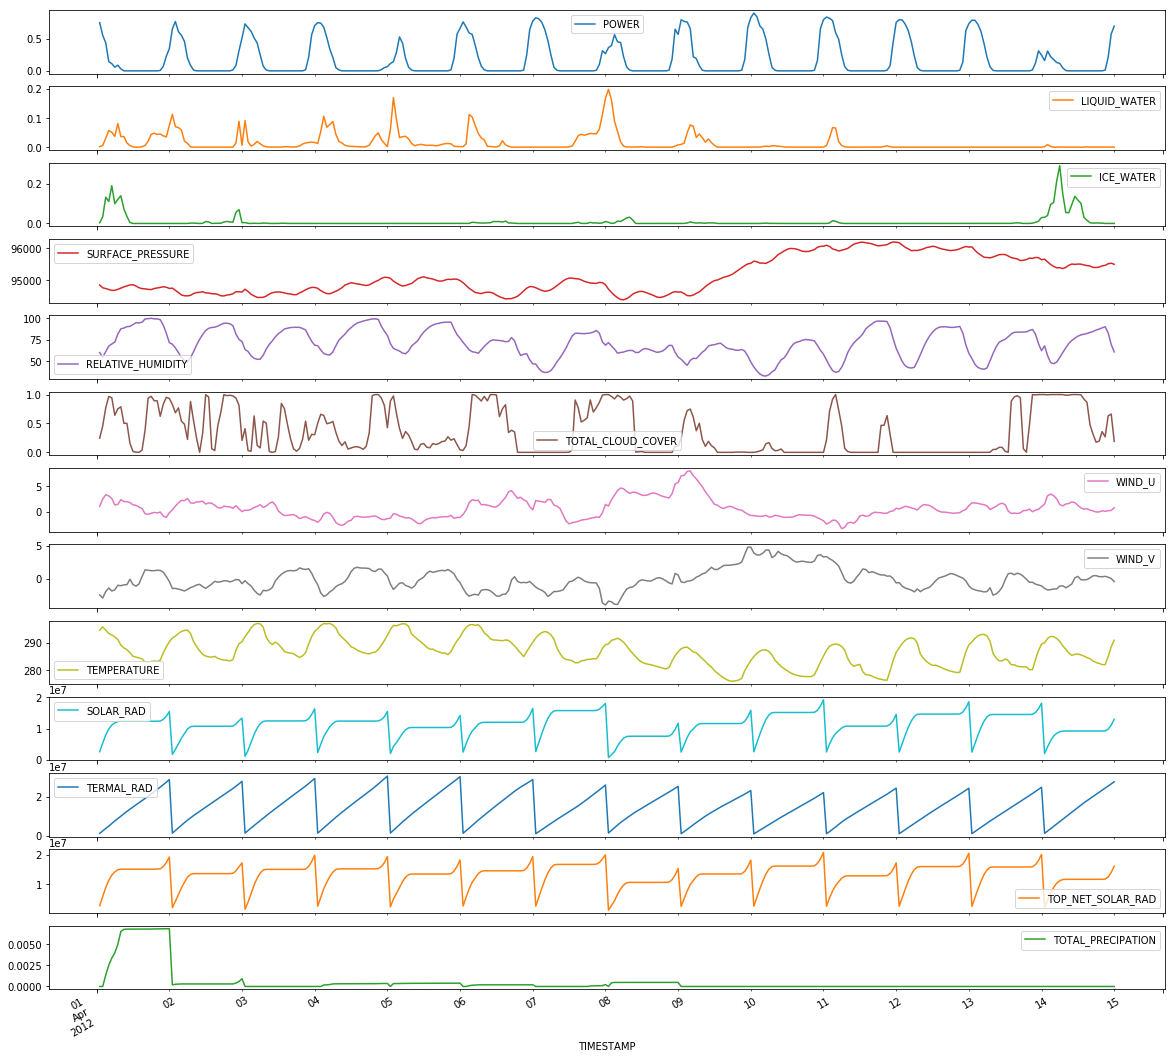

In [14]:
df[:ONE_WEEK*2].plot(subplots=True,figsize=(20,20))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000075657E5D68>,
      dtype=object)

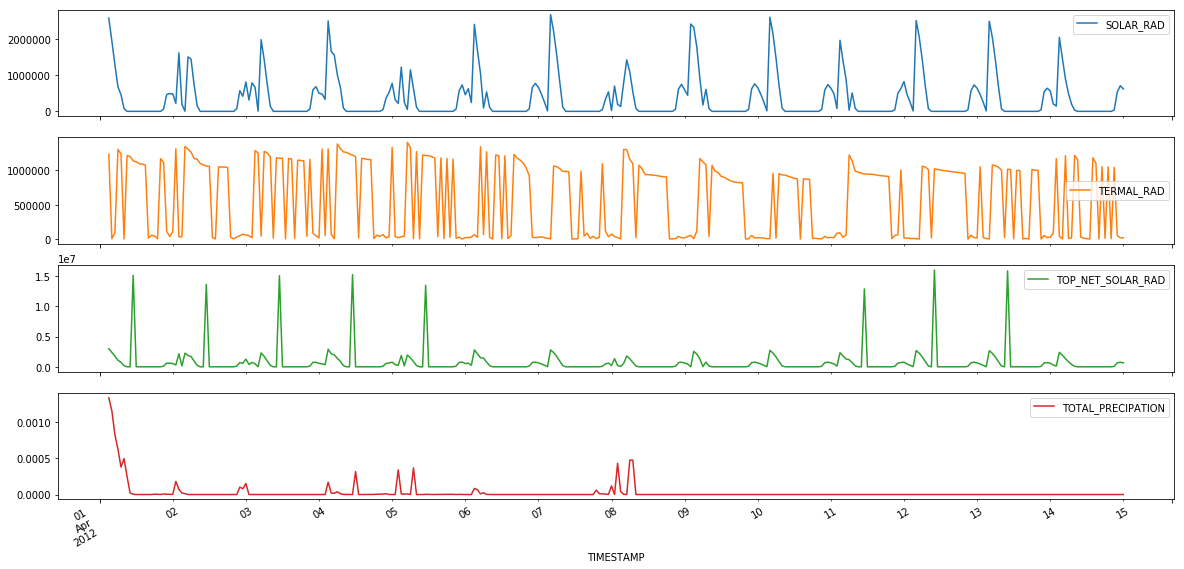

In [16]:
accumlated_columns = ["SOLAR_RAD","TERMAL_RAD","TOP_NET_SOLAR_RAD","TOTAL_PRECIPATION"]
df = prepare_data.dissipate_features(df=df, columns=accumlated_columns)
df[:ONE_WEEK*2][accumlated_columns].plot(subplots=True,figsize=(20,10))

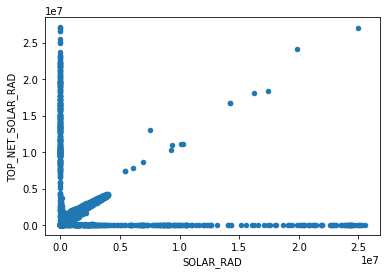

In [20]:
#just_peaks[:ONE_WEEK].plot(subplots=True,figsize=(20,20))

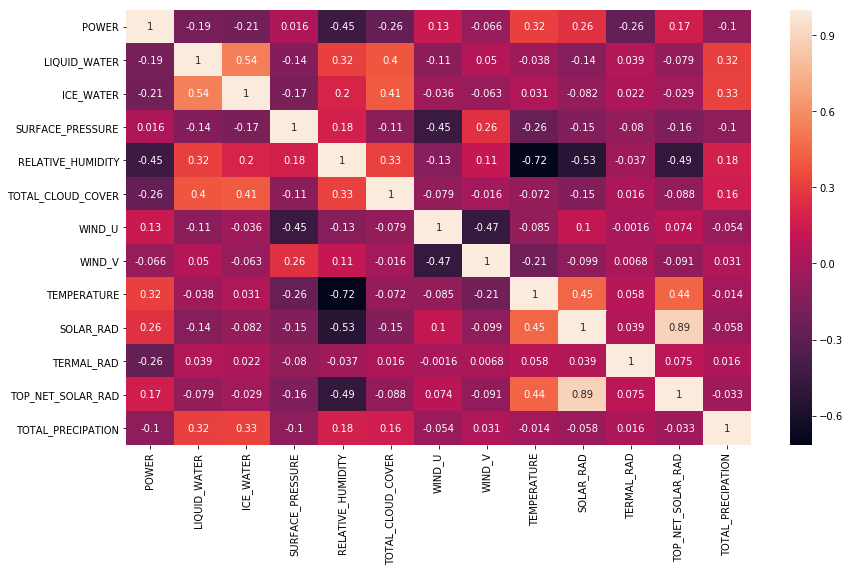

In [21]:
daytime_mask = (df.index.hour >= 21) | (df.index.hour <= 8)
df_daytime = df[daytime_mask]
fig, ax = plt.subplots(figsize=(14,8))         # Sample figsize in inches

f = (
    df_daytime.loc[:, df.columns]
        
).corr()

sns.heatmap(f, annot=True, ax=ax)

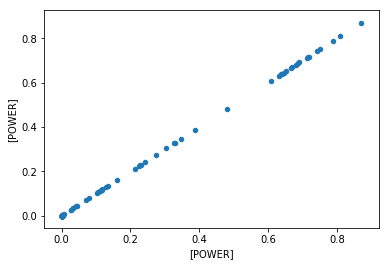

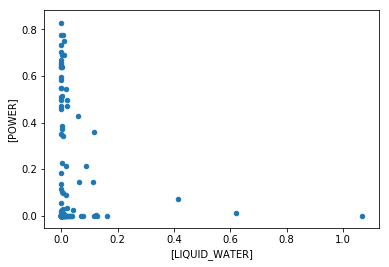

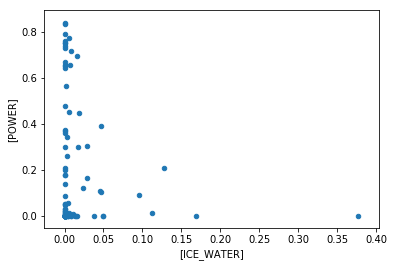

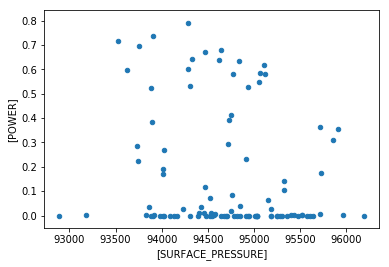

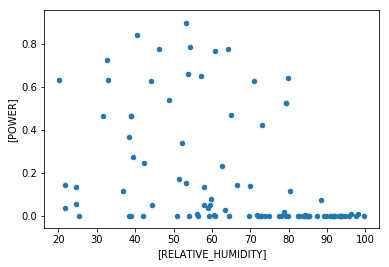

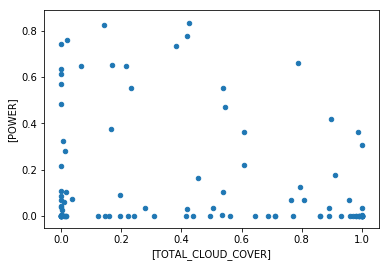

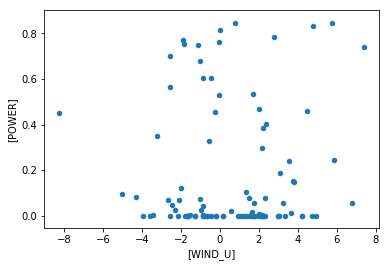

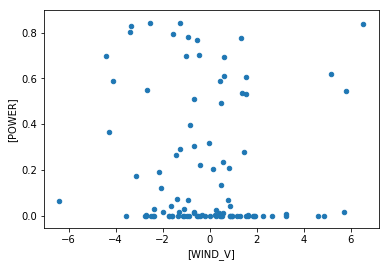

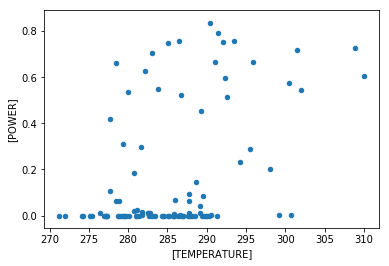

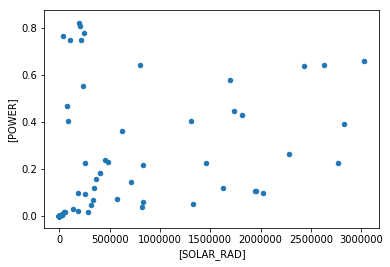

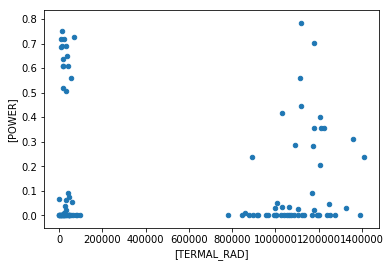

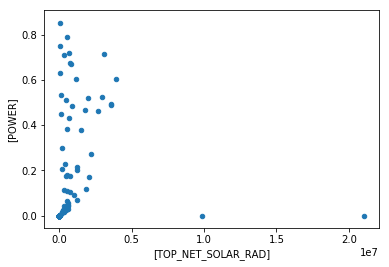

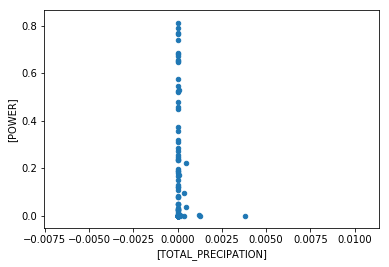

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

for i, col in enumerate(df.columns.values):
    df.sample(100, replace=True).plot(x=[col], y=["POWER"], kind="scatter")

plt.show()

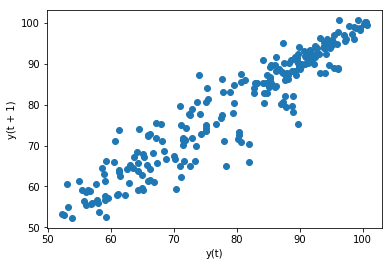

In [23]:
lag_plot(df['RELATIVE_HUMIDITY'].tail(250))

D:\Continuum\anaconda3\lib\site-packages\matplotlib\pyplot.py:984: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  return gcf().gca(**kwargs)


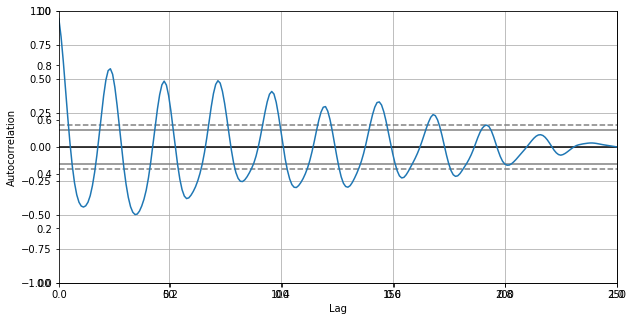

In [24]:
fig, ax = plt.subplots(figsize=(10,5))
autocorrelation_plot(df['RELATIVE_HUMIDITY'].tail(250))

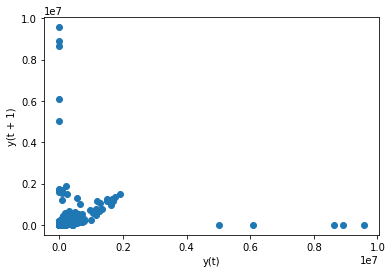

In [25]:
lag_plot(df['SOLAR_RAD'].tail(250))

D:\Continuum\anaconda3\lib\site-packages\matplotlib\pyplot.py:984: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  return gcf().gca(**kwargs)


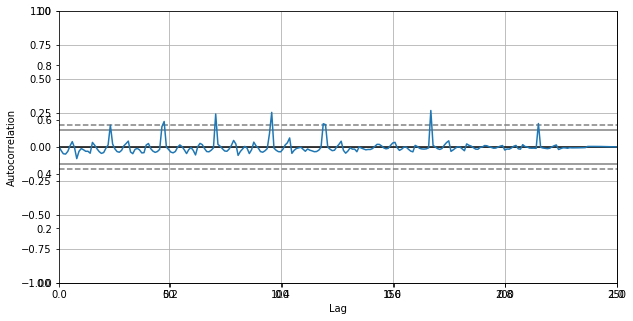

In [26]:
fig, ax = plt.subplots(figsize=(10,5))
autocorrelation_plot(df['SOLAR_RAD'].tail(250))